In [11]:
import json
import webbrowser

import dill
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pymoo.indicators.hv import Hypervolume

from enroadspy.enroads_runner import EnroadsRunner
from evolution.outcomes.outcome_manager import OutcomeManager
from enroadspy.generate_url import actions_to_url
from moo.problems.enroads_problem import EnroadsProblem

In [12]:
save_path = "results/pymoo/novelty"
with open(save_path + "/config.json", 'r') as f:
    config = json.load(f)

actions = config["actions"]
outcomes = config["outcomes"]

with open(save_path + "/results", 'rb') as f:
    res = dill.load(f)
    print("Loaded Checkpoint:", res)

Loaded Checkpoint: <pymoo.core.result.Result object at 0x107463af0>


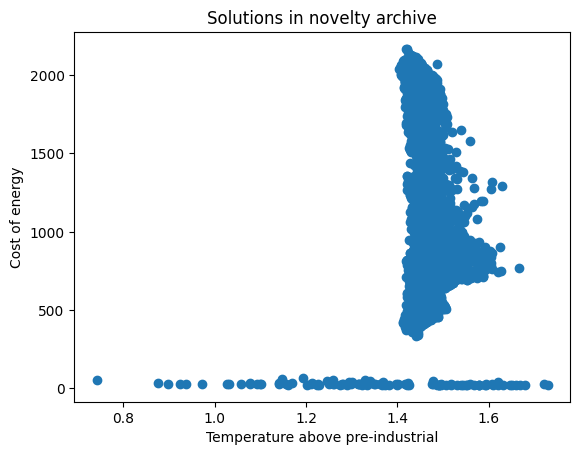

In [14]:
problem = res.problem
scaler = problem.scaler
archive = problem.archive
unscaled_archive = scaler.inverse_transform(archive)
plt.scatter(unscaled_archive[:, 0], unscaled_archive[:, 1])
plt.xlabel("Temperature above pre-industrial")
plt.ylabel("Cost of energy")
plt.title("Solutions in novelty archive")
plt.show()

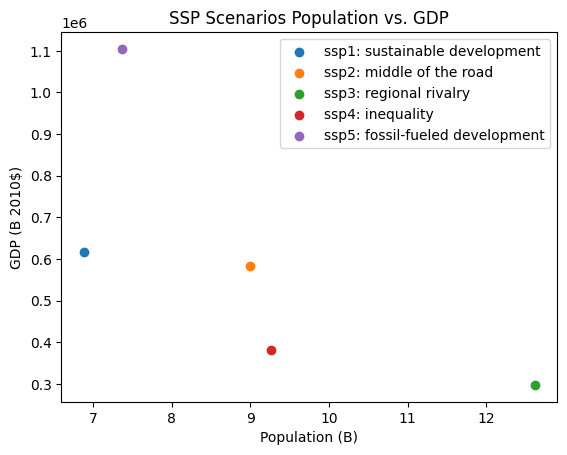

In [17]:
df = pd.DataFrame({"policy": ["ssp1: sustainable development", "ssp2: middle of the road", "ssp3: regional rivalry",
                               "ssp4: inequality", "ssp5: fossil-fueled development"],
                   "population": [6.88158, 8.99063, 12.62014, 9.26627, 7.3689],
                   "gdp": [616112.2, 583232.1, 297291.5, 381646.1, 1104488]})

for policy in df["policy"]:
    subset = df[df["policy"] == policy]
    plt.scatter(subset["population"], subset["gdp"], label=policy)
plt.title("SSP Scenarios Population vs. GDP")
plt.xlabel("Population (B)")
plt.ylabel("GDP (B 2010$)")
plt.legend()
plt.show()